<a href="https://colab.research.google.com/github/ditamaylani/PSDS_KelasMahir_PejuangData3.0/blob/main/Materi5_AlgoritmaKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritma K-Nearest Neighbor(KNN)**

Algoritma K-Nearest Neighbors adalah algoritma Machine Learning yang melakukan klasifikasi sebuah data didasarkan pada sifat-sifat data didekatnya. Sebuah ungkapan yang bisa membantu dengan mudah memahami ide dasar dari algoritma ini adalah: "Jika kamu ingin mengetahui sifat seseorang, lihatlah sifat-sifat orang
terdekatnya. Sifatnya tidak akan jauh berbeda dari mereka".

Gambar di bawah ini dapat mengilustrasikan hal di atas dengan jelas.
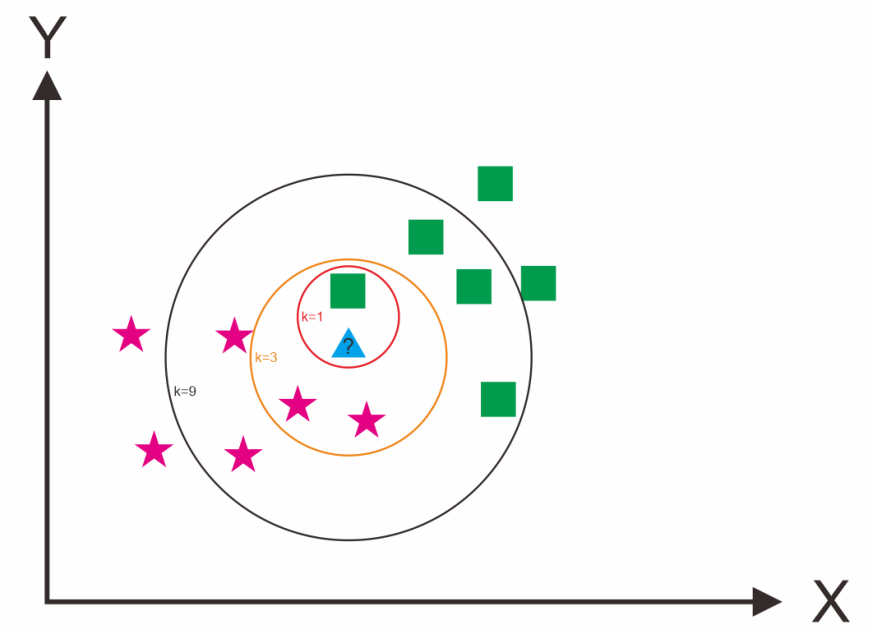

Data baru yang dilmbangkan dengan simbol segitiga biru dapat diklasifikasikan sebagai kelompok kotak hijau atau bintang merah jambu. Jika dilihat berdasarkan kriteria jumlah k=1 maka data segitiga biru diklasifikasikan ke dalam kelompok kotak hijau. Sedangkan jika dilihat berdasarkan kriteria jumlah k=3 maka data tersebut maka diklasifikasikan sebagai kelompok bintang merah jambu. Hal yang sama juga dapat diterapkan untuk k=9. Sebenarnya, kita telah melakukan klasifikasi berdasarkan jarak. Kedekatan yang dimaksud ketika k=1, k=3, dan k=9, kita selalu mengukur kedekatan antara data baru(segitiga biru) dengan data-data berlabel kelompok sebelumnya. Berdasarkan ide dasar di atas, maka diturunkanlah dalam sebuah algoritma untuk menentukan kelompok data dari sebuah inputan data baru(segitiga biru).

Adapun algoritma KNN sebagai berikut:
1. Menentukan parameter k (jumlah tetangga paling dekat).
2. Menghitung jarak eucliden objek terhadap data training yang diberikan.
3. Mengurutkan hasil no 2 secara ascending (berurutan dari nilai tinggi ke rendah)
4. Mengumpulkan kategori data (Klasifikasi nearest neighbor berdasarkan nilai k)
5. Dengan menggunakan kategori nearest neighbor yang paling mayoritas maka dapat dipredisikan kategori
objek.

# **Contoh Perhitungan Manual Algoritma KNN**

Diketahui data $x_1$ dan $x_2$ adalah sebagai berikut:

\begin{matrix}
x_1 & x_2 & \text{Kelas} \\
1 & 1 & 0 \\
2 & 2 & 0 \\
3 & 2 & 0 \\
12 & 11 & 1 \\
11 & 13 & 1 \\
14 & 15 & 1 \\
\end{matrix}

Kita diminta menentukan kelas dari data baru yaitu (9,10) dengan parameter k=3

**Langkah 1:**

Menentukan parameter k (jumlah tetangga paling dekat)

k=3




**Langkah 2:**

Menghitung jarak eucliden objek terhadap data training yang diberikan.

Formula jarak Euclidean:

$$ d_ij = \sqrt{(x1_i - x1_j)^2 + (x2_i - x2_j)^2} $$ 
untuk $ i,j = 1,2,3,...,n $

\begin{matrix}
x_1 & x_2 & \text{Jarak Euclidean dengan (9, 10)} \\
1 & 1 & \sqrt{(9 - 1)^2 + (10 - 1)^2} = 12.04 \\
2 & 2 & \sqrt{(9 - 2)^2 + (10 - 2)^2} = 10.63 \\
3 & 2 & \sqrt{(9 - 3)^2 + (10 - 2)^2} = 10 \\
12 & 11 & \sqrt{(9 - 12)^2 + (10 - 11)^2} = 3.16 \\
11 & 13 & \sqrt{(9 - 11)^2 + (10 - 13)^2} = 3.60 \\
14 & 15 & \sqrt{(9 - 14)^2 + (10 - 15)^2} = 7.07 \\
\end{matrix}



**Langkah 3:**

Mengurutkan hasil langkah 2 secara ascending (berurutan dari nilai tinggi ke rendah)

\begin{matrix}
x_1 & x_2 & \text{Jarak Euclidean dengan (9, 10)} & \text{Urutan(Jarak terpendek)} \\
1 & 1 & \sqrt{(9 - 1)^2 + (10 - 1)^2} = 12.04 & 6\\
2 & 2 & \sqrt{(9 - 2)^2 + (10 - 2)^2} = 10.63 & 5\\
3 & 2 & \sqrt{(9 - 3)^2 + (10 - 2)^2} = 10 & 4\\
12 & 11 & \sqrt{(9 - 12)^2 + (10 - 11)^2} = 3.16 & 1\\
11 & 13 & \sqrt{(9 - 11)^2 + (10 - 13)^2} = 3.60 & 2\\
14 & 15 & \sqrt{(9 - 14)^2 + (10 - 15)^2} = 7.07 & 3\\
\end{matrix}

**Langkah 4:**

Mengumpulkan kategori data (Klasifikasi nearest neighbor berdasarkan nilai k)
Kelas data 3 data terdekat(k=3)

(12,11) = 1, (11,13) = 1, (14,15) = 1

**Langkah 5:**

Dengan menggunakan kategori nearest neighbor yang paling mayoritas maka dapat dipredisikan kategori objek.

Kelas data untuk k=3

'0'=0, '1'=3

Maka disimpulkan bahwa data (9,10) diklasifikasikan ke kelas '1'.

# **KNN Python From Scratch**

## **Membangun Model KNN**

Pertama, import library python yang dibutuhkan yaitu:
*   Numpy
*   Pandas
*   Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Untuk memahami konsep, kita akan menggunakan data X dan Y seperti yang kita tunjukkan pada proses penghitungan manual.

In [2]:
X=np.array([[1,1], [2,2], [3,2], [12,11], [11,13], [14,15]])
y=np.array([0,0,0,1,1,1])
x_baru=np.array([9,10])

In [3]:
X

array([[ 1,  1],
       [ 2,  2],
       [ 3,  2],
       [12, 11],
       [11, 13],
       [14, 15]])

In [4]:
y

array([0, 0, 0, 1, 1, 1])

In [5]:
x_baru

array([ 9, 10])

**Langkah 1:**

Menentukan parameter k (jumlah tetangga paling dekat)

In [6]:
k=3

**Langkah 2:**

Menghitung kuadrat jarak eucliden objek terhadap data training yang diberikan.

In [7]:
def jarak_euclidean(x,y):
  return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))

In [8]:
jarak=[]
for x_i in X:
  jarak_euclid=jarak_euclidean(x_i,x_baru)
  jarak.append(jarak_euclid)
  print(jarak)
print(jarak)

[12.041594578792296]
[12.041594578792296, 10.63014581273465]
[12.041594578792296, 10.63014581273465, 10.0]
[12.041594578792296, 10.63014581273465, 10.0, 3.1622776601683795]
[12.041594578792296, 10.63014581273465, 10.0, 3.1622776601683795, 3.605551275463989]
[12.041594578792296, 10.63014581273465, 10.0, 3.1622776601683795, 3.605551275463989, 7.0710678118654755]
[12.041594578792296, 10.63014581273465, 10.0, 3.1622776601683795, 3.605551275463989, 7.0710678118654755]


**Langkah 3:**

Mengurutkan hasil langkah 2 secara ascending (berurutan dari nilai tinggi ke rendah)

In [9]:
urut=np.sort(jarak)
list_urut=[]
for i in range(len(urut)):
  list_urut.append(urut[i])
print(list_urut)

[3.1622776601683795, 3.605551275463989, 7.0710678118654755, 10.0, 10.63014581273465, 12.041594578792296]


In [13]:
# Mengambil index urutan
urutan=[]
for i in list_urut:
  urtn=jarak.index(i)
  urutan.append(urtn)
print(urutan)

[3, 4, 5, 2, 1, 0]


atau dengan sederhana dapat menggunakan `np.argsort` seperti berikut:

In [14]:
# Mengambil index urutan
np.argsort(jarak)

array([3, 4, 5, 2, 1, 0])

**Langkah 4:**

Mengumpulkan kategori data (Klasifikasi nearest neighbor berdasarkan nilai k)

Kelas data 3 data terdekat(k=3)

In [12]:
ambil=urutan[:k]
print(y[ambil])

[1 1 1]


**Langkah 5:**

Dengan menggunakan kategori nearest neighbor yang paling mayoritas maka dapat dipredisikan kategori objek.

In [15]:
from collections import Counter # Melakukan counter untuk mengetahui data terdekat lebih banyak di kelas 0 atau 1
kelas_paling_banyak = Counter(y[ambil]).most_common(1) # Mengambil data terdekat di kelas 1
kelas_paling_banyak

[(1, 3)]

In [16]:
kelas_paling_banyak[0][0]

1

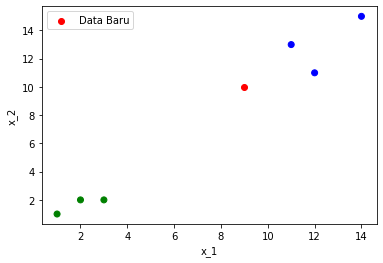

In [17]:
# Plot Data
df = pd.DataFrame(X, columns =['x1', 'x2'])
colormap = np.array(['g', 'b'])
label=['A', 'A', 'A', 'B', 'B', 'B']

# Plot Titik Data
plt.scatter(df['x1'], df['x2'], color=colormap[y])
plt.scatter(x_baru[0], x_baru[1], color='r', label='Data Baru')

# Label sumbu
plt.xlabel('x_1')

# Label sumbu y
plt.ylabel('x_2')

# Menampilkan Legenda
plt.legend()

# Menampilkan Gambar Hasil Plot
plt.show()

Maka disimpulkan bahwa data (9,10) diklasifikasikan ke kelas '1'.

## **Implementasi Model KNN Pada Data Real**

Kita akan menggunakan dataset Iris yang tersedia di sklearn dataset.

In [18]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

Memilih dataset X(iris.data) dan dataset y(iris.target).

In [19]:
X, y = iris.data, iris.target

Membagi dataset menjadi data latih dan data uji

In [20]:
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.20, random_state=1234)

Menuliskan algoritma KNN dalam bentuk fungsi

In [21]:
def _knn(x):
  # Menghitung jarak antara x baru dengan semua sampel di data latih
  jarak = [jarak_euclidean(x, x_latih) for x_latih in X_latih]
  # Mengurutkan data dan mengambil sejumlah k objek
  k_idx = np.argsort(jarak)[: k]
  # Mengambil kelas dari k tetangga terdekat dari data latih
  k_neighbor_labels = [y_latih[i] for i in k_idx]
  # Mengambil kelas yang paling sering muncul
  kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
  return kelas_paling_banyak[0][0]

def KNN(X_latih, y_latih, k, x_baru):
  y_pred= [_knn(x_i) for x_i in x_baru]
  return np.array(y_pred)

In [22]:
y_pred=KNN(X_latih, y_latih, k, X_uji)
y_pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [23]:
y_uji

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

## **Evaluasi Model**

Evaluasi model digunakan untuk melihat seberapa baik metode ini bekerja pada data uji yang diberikan. Salah satu metrik yang dapat digunakan adalah akurasi. Metrik ini menghitung jumlah hasil prediksi yang sesuai dengan label sesungguhnya kemudian dibagi dengan jumlah keseluruhan label. Menggunakan bahasa python akurasi dapat dituliskan sebagai berikut.

In [24]:
def akurasi(y_asli, y_pred):
  akurasi = np.sum(y_asli == y_pred) / len(y_asli)
  return akurasi

In [25]:
akurasi(y_uji , y_pred)

1.0

Diperoleh hasil akurasi 1.0 artinya metode KNN dapat melakukan prediksi dengan tepat untuk semua data uji yang digunakan.